# Gather speed data from SFMTA

This notebook gathers data from the SFMTA website

In [14]:
import pandas as pd
import geopandas as gpd
import sys
import os
import re

sys.path.insert(0, '../utils/')
from api import get_sfmta_data
from traffic_processing import coordinate_mapper, SFDATA_file_cleaner, aggregate_by_region, region_by_time_generator
from decorators import timer

%matplotlib inline

In [2]:
coordinate_mapper = timer(coordinate_mapper)
aggregate_by_region = timer(aggregate_by_region)
region_by_time_generator = timer(region_by_time_generator)

## 1. Get 2016 speed data
Warning: This step can take several hours depending on internet speed

In [3]:
# base_url = 'ftp://avl-data.sfmta.com/avl_data/avl_raw/'
# file_directory = './data/speed_data_2016/'
# get_sfmta_data(base_url, file_directory)

## 2. Clean 2016 speed data

The raw data from SFMTA has a misformatting issue that causes the first row of data to be read as the header. 
Clean the file so that it is formatted correctly. 

*Note: Check that file path directories are properly configured*

In [4]:
len(os.listdir('../../raw_data/speed_data_2016/2016_sfmta/'))

328

In [4]:
input_dir = '../../raw_data/speed_data_2016/2016_sfmta/'
output_dir = '../../temp_data/2016_sfmta_clean/'
# Make sure .DS_Store is removed.

for file in sorted(os.listdir(input_dir)):
    SFDATA_file_cleaner(input_dir, output_dir, file)

sfmtaAVLRawData01032016.csv cleaned
sfmtaAVLRawData01042016.csv cleaned
sfmtaAVLRawData01052016.csv cleaned
sfmtaAVLRawData01062016.csv cleaned
sfmtaAVLRawData01072016.csv cleaned
sfmtaAVLRawData01082016.csv cleaned
sfmtaAVLRawData01092016.csv cleaned
sfmtaAVLRawData01102016.csv cleaned
sfmtaAVLRawData01112016.csv cleaned
sfmtaAVLRawData01122016.csv cleaned
sfmtaAVLRawData01132016.csv cleaned
sfmtaAVLRawData01142016.csv cleaned
sfmtaAVLRawData01152016.csv cleaned
sfmtaAVLRawData01162016.csv cleaned
sfmtaAVLRawData01172016.csv cleaned
sfmtaAVLRawData01182016.csv cleaned
sfmtaAVLRawData01192016.csv cleaned
sfmtaAVLRawData01202016.csv cleaned
sfmtaAVLRawData01212016.csv cleaned
sfmtaAVLRawData01222016.csv cleaned
sfmtaAVLRawData01232016.csv cleaned
sfmtaAVLRawData01242016.csv cleaned
sfmtaAVLRawData01252016.csv cleaned
sfmtaAVLRawData01262016.csv cleaned
sfmtaAVLRawData01272016.csv cleaned
sfmtaAVLRawData01282016.csv cleaned
sfmtaAVLRawData01292016.csv cleaned
sfmtaAVLRawData01302016.csv 

In [5]:
len(os.listdir(output_dir))

328

Oddly, there are gaps within the dta where certain dates contain 0 records. In order to test performance over a contiguous sequence, we will select a range of dates that do not contain any missing values. 

For this, we will use data collected from the start of april to the end of october (6 mo period)

## 3. load all data + format

In [3]:
# Filtered Census Zones (GIS data with GeoID)
shp_file = '../../temp_data/sf_GEOID_GIS_data.shp'

# Input directory
input_dir = '../../temp_data/2016_sfmta_clean/'

# Output directory
output_dir = '../../temp_data/2016_sfmta_mapped/'

In [4]:
# Load census data 
shp_file = gpd.GeoDataFrame.from_file(shp_file)
print('Size of census zones df: {}'.format(shp_file.shape))
shp_file.head()

Size of census zones df: (196, 2)


,geoid10,geometry
0,6075016500,"POLYGON ((-122.446471 37.775802, -122.44478 37..."
1,6075016400,"POLYGON ((-122.44034 37.77658, -122.439844 37...."
2,6075016300,"POLYGON ((-122.429152 37.778007, -122.428909 3..."
3,6075016100,"POLYGON ((-122.428909 37.778039, -122.429152 3..."
4,6075016000,"POLYGON ((-122.420425 37.780583, -122.420336 3..."


Remove the special region 6075990100 as we found during the exploratory analysis that this region was generally above water. 

In [6]:
filtered_regions = shp_file[shp_file['geoid10'] != 6075990100]
print('Dimensions: {}'.format(filtered_regions.shape))

Dimensions: (195, 2)


### 3.a. Map to coordinate regions

In [ ]:
# Map each to corresponding census zones 
for fname in os.listdir(input_dir):
    if fname.endswith('.csv'):
        coordinate_mapper(shp_file, input_dir, output_dir, fname)

Running coordinate_mapper...


/Users/koki/Documents/Learning/UMICH_Courses/SI_699_Big_Data/rushhour_2/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Finished in 27.4045s
Running coordinate_mapper...
Finished in 37.7823s
Running coordinate_mapper...
Finished in 80.9000s
Running coordinate_mapper...
Finished in 105.8819s
Running coordinate_mapper...
Finished in 101.5853s
Running coordinate_mapper...
Finished in 39.4812s
Running coordinate_mapper...
Finished in 114.3652s
Running coordinate_mapper...
Finished in 129.6216s
Running coordinate_mapper...
Finished in 81.2019s
Running coordinate_mapper...
Finished in 91.0683s
Running coordinate_mapper...
Finished in 88.3771s
Running coordinate_mapper...
Finished in 93.0272s
Running coordinate_mapper...
Finished in 128.2917s
Running coordinate_mapper...
Finished in 36.9303s
Running coordinate_mapper...
Finished in 79.7390s
Running coordinate_mapper...
Finished in 117.0210s
Running coordinate_mapper...
Finished in 134.1545s
Running coordinate_mapper...
Finished in 134.3598s
Running coordinate_mapper...
Finished in 25.1292s
Running coordinate_mapper...
Finished in 17.1236s
Running coordinate_ma

mapped the remainder of files on flux. 

In [10]:
len(os.listdir(input_dir))

215

In [14]:
# import shutil
# for fname in sorted(os.listdir(input_dir)):
#     if 'mapped_' + fname in os.listdir(output_dir):
#         print('Moving {} --> holdout folder'.format(fname))
#         shutil.move(input_dir + fname, input_dir+'holdout/'+fname)

# # Number of files after move 
# print(len(os.listdir(input_dir)))

Moving sfmtaAVLRawData04022016.csv --> holdout folder
Moving sfmtaAVLRawData04122016.csv --> holdout folder
Moving sfmtaAVLRawData04242016.csv --> holdout folder
Moving sfmtaAVLRawData05012016.csv --> holdout folder
Moving sfmtaAVLRawData05082016.csv --> holdout folder
Moving sfmtaAVLRawData05102016.csv --> holdout folder
Moving sfmtaAVLRawData05112016.csv --> holdout folder
Moving sfmtaAVLRawData05182016.csv --> holdout folder
Moving sfmtaAVLRawData05272016.csv --> holdout folder
Moving sfmtaAVLRawData06042016.csv --> holdout folder
Moving sfmtaAVLRawData06052016.csv --> holdout folder
Moving sfmtaAVLRawData06142016.csv --> holdout folder
Moving sfmtaAVLRawData06152016.csv --> holdout folder
Moving sfmtaAVLRawData06232016.csv --> holdout folder
Moving sfmtaAVLRawData07062016.csv --> holdout folder
Moving sfmtaAVLRawData07162016.csv --> holdout folder
Moving sfmtaAVLRawData07202016.csv --> holdout folder
Moving sfmtaAVLRawData07212016.csv --> holdout folder
Moving sfmtaAVLRawData072920

In [20]:
len(sorted(os.listdir(input_dir+'flux_data/')))

177

In [21]:
len(os.listdir(output_dir))

37

### 3.b. Aggregate by census region

In [3]:
input_dir = '../../temp_data/2016_sfmta_mapped/'
output_dir ='../../temp_data/data_by_region/'

In [4]:
aggregate_by_region(input_dir, output_dir)

Running aggregate_by_region...
finished partitioning mapped_sfmtaAVLRawData04012016.csv
finished partitioning mapped_sfmtaAVLRawData04022016.csv
finished partitioning mapped_sfmtaAVLRawData04032016.csv
finished partitioning mapped_sfmtaAVLRawData04042016.csv
finished partitioning mapped_sfmtaAVLRawData04052016.csv
finished partitioning mapped_sfmtaAVLRawData04062016.csv
finished partitioning mapped_sfmtaAVLRawData04072016.csv


/Users/koki/Documents/Learning/UMICH_Courses/SI_699_Big_Data/rushhour_2/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


finished partitioning mapped_sfmtaAVLRawData04082016.csv
finished partitioning mapped_sfmtaAVLRawData04092016.csv
finished partitioning mapped_sfmtaAVLRawData04102016.csv
finished partitioning mapped_sfmtaAVLRawData04112016.csv
finished partitioning mapped_sfmtaAVLRawData04122016.csv
finished partitioning mapped_sfmtaAVLRawData04132016.csv
finished partitioning mapped_sfmtaAVLRawData04142016.csv
finished partitioning mapped_sfmtaAVLRawData04152016.csv
finished partitioning mapped_sfmtaAVLRawData04162016.csv
finished partitioning mapped_sfmtaAVLRawData04172016.csv
finished partitioning mapped_sfmtaAVLRawData04192016.csv
finished partitioning mapped_sfmtaAVLRawData04202016.csv
finished partitioning mapped_sfmtaAVLRawData04212016.csv
finished partitioning mapped_sfmtaAVLRawData04222016.csv
finished partitioning mapped_sfmtaAVLRawData04232016.csv
finished partitioning mapped_sfmtaAVLRawData04242016.csv
finished partitioning mapped_sfmtaAVLRawData04252016.csv
finished partitioning mapped_sf

In [6]:
len(os.listdir(output_dir))

195

## 3.c. Remove outliers 

In [10]:
# Monthly speed data by region
region_data_dir = '../../temp_data/data_by_region/'
print('Number of region files: {}'.format(len(os.listdir(region_data_dir))))
files = os.listdir(region_data_dir)

Number of region files: 195


In [11]:
output_dir = "../../temp_data/data_by_region_filtered/"

In [14]:
size = [] # Count total number of rows read
weights = {} # Create region: size weight dictionary 

# excluded_v_types = ["SYDNEY CAR #0496", "LRV3-MOD11 - EBALD"]

for n, i in enumerate(files):
    data_table = pd.read_csv(region_data_dir + i, dtype={"VEHICLE_TAG": str})
    size.append(data_table.shape[0])
#     data_table["VEHICLE_NAME"] = data_table["VEHICLE_TAG"].map(vehicle_map)
    
    # Filter out extreme outliers
    data_table_f = data_table[data_table['SPEED'] <= 30].reset_index(drop=True)
    
    # Filter out excluded vehicle types
#     data_table_f = data_table_f[~data_table_f["VEHICLE_NAME"].isin(excluded_v_types)].reset_index(drop=True)
    
    weights[re.sub("time_series_|\.csv", "", i)] = data_table_f.shape[0]
    
    data_table_f.to_csv(output_dir + "filtered_{}".format(i), index=False)
    difference = data_table.shape[0] - data_table_f.shape[0]
    print("#{}. {} - finished filtering - {} original # of rows - {} row(s) removed - {:.5f}% reduction".format(n, i, data_table.shape[0], difference, (difference / data_table.shape[0])*100))

print('****DONE. Total number of rows read: {}****'.format(sum(size)))

#0. time_series_region_6075047801.csv - finished filtering - 422647 original # of rows - 6 row(s) removed - 0.00142% reduction
#1. time_series_region_6075012800.csv - finished filtering - 631176 original # of rows - 19 row(s) removed - 0.00301% reduction
#2. time_series_region_6075021400.csv - finished filtering - 197468 original # of rows - 19 row(s) removed - 0.00962% reduction
#3. time_series_region_6075025100.csv - finished filtering - 537271 original # of rows - 151 row(s) removed - 0.02810% reduction
#4. time_series_region_6075042602.csv - finished filtering - 411684 original # of rows - 6 row(s) removed - 0.00146% reduction
#5. time_series_region_6075023001.csv - finished filtering - 438256 original # of rows - 188 row(s) removed - 0.04290% reduction
#6. time_series_region_6075030900.csv - finished filtering - 1019362 original # of rows - 22 row(s) removed - 0.00216% reduction
#7. time_series_region_6075013101.csv - finished filtering - 230820 original # of rows - 4 row(s) remov

In [19]:
# save weights as pickle file
pickle.dump(weights, open("../../output/region_weights.5mo.p", "wb"))

# save weight as csv
with open("../../output/region_weights.5mo.csv", "w") as outfile:
    writer = csv.writer(outfile)
    for k, v in weights.items():
        writer.writerow([k,v])

## 3.c. Format data into frequency level timeseries

In [21]:
input_dir = '../../temp_data/data_by_region_filtered/'
print('Number of region files: {}'.format(len(os.listdir(input_dir))))

Number of region files: 195


In [22]:
sample_time_series = region_by_time_generator(input_dir, columns=['REPORT_TIME'], Y='SPEED',unit='H', usecols=[1,5])

Running region_by_time_generator...
Reading files from directory: ../../temp_data/data_by_region_filtered/
Finished reading filtered_time_series_region_6075010100.csv
Finished reading filtered_time_series_region_6075010200.csv
Finished reading filtered_time_series_region_6075010300.csv
Finished reading filtered_time_series_region_6075010400.csv
Finished reading filtered_time_series_region_6075010500.csv
Finished reading filtered_time_series_region_6075010600.csv
Finished reading filtered_time_series_region_6075010700.csv
Finished reading filtered_time_series_region_6075010800.csv
Finished reading filtered_time_series_region_6075010900.csv
Finished reading filtered_time_series_region_6075011000.csv
Finished reading filtered_time_series_region_6075011100.csv
Finished reading filtered_time_series_region_6075011200.csv
Finished reading filtered_time_series_region_6075011300.csv
Finished reading filtered_time_series_region_6075011700.csv
Finished reading filtered_time_series_region_60750118

In [23]:
sample_time_series.to_csv('../../output/region_by_time_series_5mo.csv', index=True)

## 4. Fill empty values 

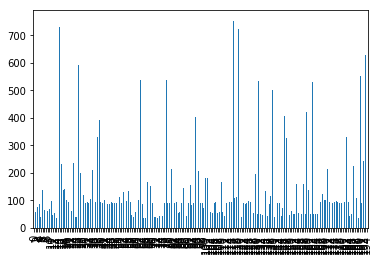

In [16]:
sample_time_series = pd.read_csv('../../output/region_by_time_series_5mo.csv')
cells = sample_time_series.shape[0] * sample_time_series.shape[1]
sample_time_series.isna().sum(axis=1).plot(kind='bar')

In [19]:
sum(sample_time_series.isna().sum()) / cells

0.036712588808397194

In [20]:
sample_time_series = sample_time_series.fillna(0)
sample_time_series.to_csv('../../output/region_by_time_series_5mo.csv')